In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import requests
import json
import numpy as np

In [2]:
messageDF = pd.read_csv("spam.csv")

In [3]:
print(messageDF)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
data = {}

In [4]:

#listMessages['type'].append(messageDF['v1'])

for ind in messageDF.index:
    for word in messageDF['v2'][ind].replace(",", "").replace(".", "") .split(" "):
        if word not in data:
            if messageDF['v1'][ind] == "spam":
                data[word] = [1,0]
            else:
               data[word] = [0,1]
        else:
            if messageDF['v1'][ind] == "spam":
                data[word][0] += 1
            else:
                data[word][1] += 1
            



In [5]:
spamOrHam = {}

for word in data:
    if data[word][0] == 0:
        spamOrHam[word] = 1/20
    elif data[word][1] == 0:
        spamOrHam[word] = 20
    elif (data[word][0])/(data[word][1]) < 1/20:
        spamOrHam[word] = 1/20
    elif (data[word][0])/(data[word][1]) > 20:
        spamOrHam[word] = 20/1
    else:
        spamOrHam[word] = data[word][0]/data[word][1]

In [ ]:
# Part A

In [42]:

americancorpus = pd.read_csv("wayback.txt", sep="\t")

In [43]:
print(americancorpus)

      class  subscriber                                       message_body  \
0         0           1  Hey sir I have a question on software I am doi...   
1         0           1  s the same guys name as the first but it will ...   
2         0           1       thing that I have to do to allow me to do it   
3         0           1  The identity field must be unique, but you can...   
4         0           1                                     Ok thank u sir   
...     ...         ...                                                ...   
4929      0         156                                          of course   
4930      0         148                                            I heard   
4931      0         154                                            Oh well   
4932      0         156                                           cu in 20   
4933      1         156                                 thx for the tecate   

         timestamp      type  
0     4/4/11 14:40  Incoming  
1

In [ ]:
#Part B

In [44]:
logOdds = {}
for word in spamOrHam:
    logOdds[word] = math.log(spamOrHam[word])

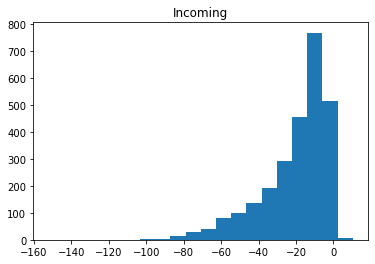

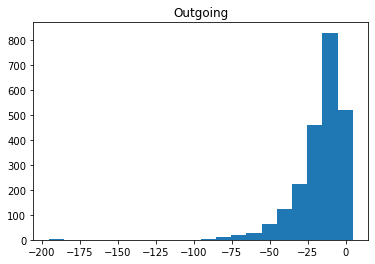

In [47]:
listOddsI = []
listOddsO = []

for ind in americancorpus.index:
    totalIP = 0
    totalOP = 0
    if americancorpus['type'][ind] == "Incoming":
        for word in americancorpus['message_body'][ind].replace(",", "").replace(".", "") .split(" "):
            if word in logOdds:
                totalIP += logOdds[word]
        listOddsI.append(totalIP)
    else:
        for word in americancorpus['message_body'][ind].replace(",", "").replace(".", "") .split(" "):
            if word in logOdds:
                totalOP += logOdds[word]
        listOddsO.append(totalOP)
plt.title('Incoming')
plt.hist(listOddsI, bins=20, )
plt.show()
plt.title('Outgoing')
plt.hist(listOddsO, bins=20)
plt.show()

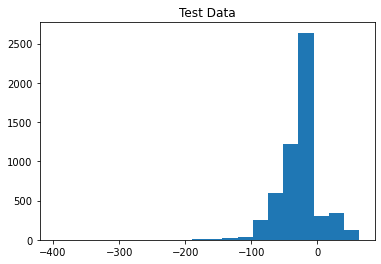

In [48]:
listOdds = []

for ind in messageDF.index:
    totalP = 0
    for word in messageDF['v2'][ind].replace(",", "").replace(".", "") .split(" "):
        if word in logOdds:
            totalP += logOdds[word]
    listOdds.append(totalP)

plt.title("Test Data")
plt.hist(listOdds, bins=20)
plt.show()